## Feature Extraction

### Preprocessing

In [1]:
import ftfy
import re

hashtag_re = re.compile(r"#\w+")
mention_re = re.compile(r"@\w+")
url_re = re.compile(r"(?:https?://)?(?:[-\w]+\.)+[a-zA-Z]{2,9}[-\w/#~:;.?+=&%@~]*")

def preprocess(text):
    p_text = hashtag_re.sub("[hashtag]",text)
    p_text = mention_re.sub("[mention]",p_text)
    p_text = url_re.sub("[url]",p_text)
    p_text = ftfy.fix_text(p_text)
    return p_text

In [2]:
tweet = "This week we’re at a #careers event in #Blackpool @Pleasure_Beach, talking to students about #languages and language careers! Come have a go at some of our activities! 🌏#LoveLanguages #LoveLancaster @Lancaster_CI https://t.co/vQQWdrUuqh"
p_tweet = preprocess(tweet)

### Tokenisation

In [6]:
tokenise_re = re.compile(r"(\[[^\]]+\]|[-'\w]+|[^\s\w\[']+)") #([]|words|other non-space)
def custom_tokenise(text):
    return tokenise_re.findall(text)

In [69]:
# Sentence tokenisation
from nltk.tokenize import sent_tokenize
sent_tokenize(p_tweet)

["This week we're at a [hashtag] event in [hashtag] [mention], talking to students about [hashtag] and language careers!",
 'Come have a go at some of our activities!',
 '🌏[hashtag] [hashtag] [mention] [url]']

In [7]:
def print_tokens(tokens):
    for token in tokens: #iterate tokens and print one per line.
        print(token)
    print(f"Total: {len(tokens)} tokens")

def save_tokens(tokens, outfile):
    with open(outfile, 'w', encoding="utf-8") as f:
        for token in tokens: #iterate tokens and output to file.
            f.write(token + '\n')
        f.write(f"Total: {len(tokens)} tokens")

### Bag of Words Feature Set

In [10]:
tokens = custom_tokenise(p_tweet)
lower_tokens = [t.lower() for t in tokens]
print_tokens(lower_tokens)

this
week
we're
at
a
[hashtag]
event
in
[hashtag]
[mention]
,
talking
to
students
about
[hashtag]
and
language
careers
!
come
have
a
go
at
some
of
our
activities
!
🌏
[hashtag]
[hashtag]
[mention]
[url]
Total: 35 tokens


In [11]:
from collections import Counter

tokens_fql = Counter(lower_tokens)
tokens_fql.most_common() #displays frequency list in descending frequency order.

[('[hashtag]', 5),
 ('at', 2),
 ('a', 2),
 ('[mention]', 2),
 ('!', 2),
 ('this', 1),
 ('week', 1),
 ("we're", 1),
 ('event', 1),
 ('in', 1),
 (',', 1),
 ('talking', 1),
 ('to', 1),
 ('students', 1),
 ('about', 1),
 ('and', 1),
 ('language', 1),
 ('careers', 1),
 ('come', 1),
 ('have', 1),
 ('go', 1),
 ('some', 1),
 ('of', 1),
 ('our', 1),
 ('activities', 1),
 ('🌏', 1),
 ('[url]', 1)]

In [12]:
# Filter bag of words
def filter_fql(fql, predefined_list):
    return Counter({t: fql[t] for t in predefined_list}) #dict comprehension, t: fql[t] is token: freq.

In [20]:
import nltk
from nltk.corpus import stopwords
stoplist = stopwords.words('english')
print(stoplist)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [21]:
def remove_list(fql, to_remove):
    filtered = Counter(fql)
    for r in to_remove:
        filtered.pop(r,None)        
    return filtered

filtered = remove_list(tokens_fql, stoplist)
print(filtered)

Counter({'[hashtag]': 5, '[mention]': 2, '!': 2, 'week': 1, "we're": 1, 'event': 1, ',': 1, 'talking': 1, 'students': 1, 'language': 1, 'careers': 1, 'come': 1, 'go': 1, 'activities': 1, '🌏': 1, '[url]': 1})


### Word n-grams

In [23]:
def ngrams(tokens, n, sep = "_", buffer="^"):
    buffered = [buffer] * (n-1) + tokens + [buffer] * (n-1) #add buffer either side to denote start and end
    return [sep.join(buffered[i:i+n]) for i in range(len(buffered)-n+1)] #list comprehension creating merged string of n chars, with a window of n through string

In [25]:
print(lower_tokens)
word_bigrams = ngrams(lower_tokens,2)
word_bigrams_fql = Counter(word_bigrams)
word_bigrams_fql.most_common()

['this', 'week', "we're", 'at', 'a', '[hashtag]', 'event', 'in', '[hashtag]', '[mention]', ',', 'talking', 'to', 'students', 'about', '[hashtag]', 'and', 'language', 'careers', '!', 'come', 'have', 'a', 'go', 'at', 'some', 'of', 'our', 'activities', '!', '🌏', '[hashtag]', '[hashtag]', '[mention]', '[url]']


[('[hashtag]_[mention]', 2),
 ('^_this', 1),
 ('this_week', 1),
 ("week_we're", 1),
 ("we're_at", 1),
 ('at_a', 1),
 ('a_[hashtag]', 1),
 ('[hashtag]_event', 1),
 ('event_in', 1),
 ('in_[hashtag]', 1),
 ('[mention]_,', 1),
 (',_talking', 1),
 ('talking_to', 1),
 ('to_students', 1),
 ('students_about', 1),
 ('about_[hashtag]', 1),
 ('[hashtag]_and', 1),
 ('and_language', 1),
 ('language_careers', 1),
 ('careers_!', 1),
 ('!_come', 1),
 ('come_have', 1),
 ('have_a', 1),
 ('a_go', 1),
 ('go_at', 1),
 ('at_some', 1),
 ('some_of', 1),
 ('of_our', 1),
 ('our_activities', 1),
 ('activities_!', 1),
 ('!_🌏', 1),
 ('🌏_[hashtag]', 1),
 ('[hashtag]_[hashtag]', 1),
 ('[mention]_[url]', 1),
 ('[url]_^', 1)]

In [26]:
word_trigrams = ngrams(lower_tokens, 3)
word_trigrams_fql = Counter(word_trigrams)
word_trigrams_fql.most_common()

[('^_^_this', 1),
 ('^_this_week', 1),
 ("this_week_we're", 1),
 ("week_we're_at", 1),
 ("we're_at_a", 1),
 ('at_a_[hashtag]', 1),
 ('a_[hashtag]_event', 1),
 ('[hashtag]_event_in', 1),
 ('event_in_[hashtag]', 1),
 ('in_[hashtag]_[mention]', 1),
 ('[hashtag]_[mention]_,', 1),
 ('[mention]_,_talking', 1),
 (',_talking_to', 1),
 ('talking_to_students', 1),
 ('to_students_about', 1),
 ('students_about_[hashtag]', 1),
 ('about_[hashtag]_and', 1),
 ('[hashtag]_and_language', 1),
 ('and_language_careers', 1),
 ('language_careers_!', 1),
 ('careers_!_come', 1),
 ('!_come_have', 1),
 ('come_have_a', 1),
 ('have_a_go', 1),
 ('a_go_at', 1),
 ('go_at_some', 1),
 ('at_some_of', 1),
 ('some_of_our', 1),
 ('of_our_activities', 1),
 ('our_activities_!', 1),
 ('activities_!_🌏', 1),
 ('!_🌏_[hashtag]', 1),
 ('🌏_[hashtag]_[hashtag]', 1),
 ('[hashtag]_[hashtag]_[mention]', 1),
 ('[hashtag]_[mention]_[url]', 1),
 ('[mention]_[url]_^', 1),
 ('[url]_^_^', 1)]

### Characters

In [33]:
def preprocess_remove(text):
    r_text = hashtag_re.sub("",text)
    r_text = mention_re.sub("",r_text)
    r_text = url_re.sub("",r_text)
    r_text = ftfy.fix_text(r_text)
    r_text = ' '.join(r_text.split())
    return r_text

In [34]:
r_tweet = preprocess_remove(tweet)
print(r_tweet)

This week we're at a event in , talking to students about and language careers! Come have a go at some of our activities! 🌏


In [35]:
char_fql = Counter(r_tweet)
char_fql.most_common()

[(' ', 24),
 ('e', 14),
 ('a', 12),
 ('t', 10),
 ('o', 7),
 ('i', 6),
 ('s', 6),
 ('n', 6),
 ('r', 4),
 ('g', 4),
 ('u', 4),
 ('v', 3),
 ('h', 2),
 ('w', 2),
 ('k', 2),
 ('l', 2),
 ('d', 2),
 ('c', 2),
 ('!', 2),
 ('m', 2),
 ('T', 1),
 ("'", 1),
 (',', 1),
 ('b', 1),
 ('C', 1),
 ('f', 1),
 ('🌏', 1)]

In [44]:
import regex
char_regex = regex.compile(r'\X') # match graphemes

test = "Remember the spicy jalapen\u0303o"
chars = char_regex.findall(test)
print(chars)

emoji_test = "This is an emoji: \U0001F468\u200D\U0001F469\u200D\U0001F467\u200D\U0001F466"
test_matches = char_regex.findall(emoji_test)
for match in test_matches:
    print(match)

['R', 'e', 'm', 'e', 'm', 'b', 'e', 'r', ' ', 't', 'h', 'e', ' ', 's', 'p', 'i', 'c', 'y', ' ', 'j', 'a', 'l', 'a', 'p', 'e', 'ñ', 'o']
T
h
i
s
 
i
s
 
a
n
 
e
m
o
j
i
:
 
👨‍👩‍👧‍👦


In [48]:
# Alternatively, can use grapheme library
import grapheme

In [49]:
graphemes = list(grapheme.graphemes(emoji_test))
for g in graphemes:
    print(g)

T
h
i
s
 
i
s
 
a
n
 
e
m
o
j
i
:
 
👨‍👩‍👧‍👦


In [51]:
char_fql = Counter(graphemes)
# char_fql.most_common()

for char in char_fql.most_common():
    print("{}\t{}".format(char[0], char[1]))

 	4
i	3
s	2
T	1
h	1
a	1
n	1
e	1
m	1
o	1
j	1
:	1
👨‍👩‍👧‍👦	1


### Character n-grams

In [53]:
# Produce character trigrams for the tweet
graphemes = list(grapheme.graphemes(p_tweet))
character_trigrams = ngrams(graphemes, 3)
character_trigrams_fql = Counter(character_trigrams)
character_trigrams_fql.most_common()

[('[_h_a', 5),
 ('h_a_s', 5),
 ('a_s_h', 5),
 ('s_h_t', 5),
 ('h_t_a', 5),
 ('t_a_g', 5),
 ('a_g_]', 5),
 ('g_]_ ', 5),
 (' _[_h', 4),
 ('e_n_t', 4),
 (']_ _[', 4),
 (' _w_e', 2),
 ('e_ _a', 2),
 (' _a_t', 2),
 ('a_t_ ', 2),
 (' _a_ ', 2),
 (' _[_m', 2),
 ('[_m_e', 2),
 ('m_e_n', 2),
 ('n_t_i', 2),
 ('t_i_o', 2),
 ('i_o_n', 2),
 ('o_n_]', 2),
 ('s_!_ ', 2),
 ('o_m_e', 2),
 ('m_e_ ', 2),
 ('^_^_T', 1),
 ('^_T_h', 1),
 ('T_h_i', 1),
 ('h_i_s', 1),
 ('i_s_ ', 1),
 ('s_ _w', 1),
 ('w_e_e', 1),
 ('e_e_k', 1),
 ('e_k_ ', 1),
 ('k_ _w', 1),
 ("w_e_'", 1),
 ("e_'_r", 1),
 ("'_r_e", 1),
 ('r_e_ ', 1),
 ('t_ _a', 1),
 ('a_ _[', 1),
 (']_ _e', 1),
 (' _e_v', 1),
 ('e_v_e', 1),
 ('v_e_n', 1),
 ('n_t_ ', 1),
 ('t_ _i', 1),
 (' _i_n', 1),
 ('i_n_ ', 1),
 ('n_ _[', 1),
 ('n_]_,', 1),
 (']_,_ ', 1),
 (',_ _t', 1),
 (' _t_a', 1),
 ('t_a_l', 1),
 ('a_l_k', 1),
 ('l_k_i', 1),
 ('k_i_n', 1),
 ('i_n_g', 1),
 ('n_g_ ', 1),
 ('g_ _t', 1),
 (' _t_o', 1),
 ('t_o_ ', 1),
 ('o_ _s', 1),
 (' _s_t', 1),
 ('s_t_u',

### Annotation

In [55]:
pos_tagged = nltk.pos_tag(tokens)
pos_tagged

[('This', 'DT'),
 ('week', 'NN'),
 ("we're", 'NN'),
 ('at', 'IN'),
 ('a', 'DT'),
 ('[hashtag]', 'JJ'),
 ('event', 'NN'),
 ('in', 'IN'),
 ('[hashtag]', 'NNP'),
 ('[mention]', 'NNP'),
 (',', ','),
 ('talking', 'VBG'),
 ('to', 'TO'),
 ('students', 'NNS'),
 ('about', 'IN'),
 ('[hashtag]', 'NN'),
 ('and', 'CC'),
 ('language', 'NN'),
 ('careers', 'NNS'),
 ('!', '.'),
 ('Come', 'NNP'),
 ('have', 'VBP'),
 ('a', 'DT'),
 ('go', 'NN'),
 ('at', 'IN'),
 ('some', 'DT'),
 ('of', 'IN'),
 ('our', 'PRP$'),
 ('activities', 'NNS'),
 ('!', '.'),
 ('🌏', 'NN'),
 ('[hashtag]', 'NNP'),
 ('[hashtag]', 'NNP'),
 ('[mention]', 'NNP'),
 ('[url]', 'NN')]

In [56]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [57]:
# Create POS frequency list
pos = [tag[1] for tag in pos_tagged]
pos_fql = Counter(pos)
pos_fql.most_common()

[('NN', 8),
 ('NNP', 6),
 ('IN', 5),
 ('DT', 4),
 ('NNS', 3),
 ('.', 2),
 ('JJ', 1),
 (',', 1),
 ('VBG', 1),
 ('TO', 1),
 ('CC', 1),
 ('VBP', 1),
 ('PRP$', 1)]

In [58]:
tokens = nltk.word_tokenize(p_tweet)
pos_tagged = nltk.pos_tag(tokens)
pos = [tag[1] for tag in pos_tagged]
pos_fql = Counter(pos)
pos_fql.most_common()

[('NN', 14),
 ('NNP', 13),
 ('IN', 5),
 ('DT', 4),
 ('JJ', 3),
 ('NNS', 3),
 ('VBP', 2),
 ('.', 2),
 ('PRP', 1),
 (',', 1),
 ('VBG', 1),
 ('TO', 1),
 ('CC', 1),
 ('PRP$', 1)]

In [62]:
# Define a function that takes the POS tagged text and post-processes the output to 
# add new tags for mentions, hashtags, urls, emojis, and anything else you can see to fix with simple rules.
from emoji import UNICODE_EMOJI

to_remove = {
    'mention': 'MENTION',
    'hashtag': 'HASHTAG',
    'url': 'URL'
}

def is_emoji(s):
    return s in UNICODE_EMOJI

def post_process_pos(pos_tagged_text):
    post_pos_tagged_text = []
    # Process items in to_remove dict    
    for (text, tag) in pos_tagged_text:
        item = None
        if text in to_remove:
            item = (text, to_remove[text])
        elif is_emoji(text):
            item = (text, 'EMOJI')
        else:
            item = (text, tag)
        post_pos_tagged_text.append(item)
    
    return post_pos_tagged_text

In [63]:
# Tokenise text and apply POS tagging
tokens = nltk.word_tokenize(p_tweet)
pos_tagged = nltk.pos_tag(tokens)

# Post-process output of POS tagging
post_pos_tagged_text = post_process_pos(pos_tagged)
print(post_pos_tagged_text)

[('This', 'DT'), ('week', 'NN'), ('we', 'PRP'), ("'re", 'VBP'), ('at', 'IN'), ('a', 'DT'), ('[', 'JJ'), ('hashtag', 'HASHTAG'), (']', 'JJ'), ('event', 'NN'), ('in', 'IN'), ('[', 'NNP'), ('hashtag', 'HASHTAG'), (']', 'NNP'), ('[', 'NNP'), ('mention', 'MENTION'), (']', 'NNP'), (',', ','), ('talking', 'VBG'), ('to', 'TO'), ('students', 'NNS'), ('about', 'IN'), ('[', 'NNP'), ('hashtag', 'HASHTAG'), (']', 'NN'), ('and', 'CC'), ('language', 'NN'), ('careers', 'NNS'), ('!', '.'), ('Come', 'NNP'), ('have', 'VBP'), ('a', 'DT'), ('go', 'NN'), ('at', 'IN'), ('some', 'DT'), ('of', 'IN'), ('our', 'PRP$'), ('activities', 'NNS'), ('!', '.'), ('🌏', 'EMOJI'), ('[', 'NNP'), ('hashtag', 'HASHTAG'), (']', 'NNP'), ('[', 'NNP'), ('hashtag', 'HASHTAG'), (']', 'NNP'), ('[', 'NNP'), ('mention', 'MENTION'), (']', 'NNP'), ('[', 'NNP'), ('url', 'URL'), (']', 'NN')]


### Length of text (chars/tokens)

In [64]:
length_chars = len(tweet) # length of text in chars
length_tokens = len(tokens) # length of text in tokens
print(length_chars)
print(length_tokens)

236
52


### Average Word Length

In [3]:
avg_word_length = sum([len(tok) for tok in tokens])/length_tokens # make a list of lengths per token, sum and divide by number of tokens
print(avg_word_length)

NameError: name 'tokens' is not defined

### Type Token Ratio (TTR)

In [66]:
length_types = len(tokens_fql) # number of unique words present
ttr = length_types / length_tokens # type token ratio (ttr) - divide number of types by number of tokens
print(ttr)

0.5192307692307693


In [67]:
# TTR is not comparable over texts of very different lengths, instead use something like Moving-Average Type-Token Ratio (MATTR)

### Hapaxes

In [68]:
hapaxes = list(tokens_fql.values()).count(1) # convert frequencies to list and count 1s.
hapax_ratio = hapaxes / length_types
print(hapax_ratio)

0.8148148148148148


### Documents

In [70]:
class Document:
    def __init__(self, meta={}):
        self.meta = meta
        self.tokens_fql = Counter() #empty counter, ready to be added to with Counter.update.
        
    def extract_features(self, texts): #document should be iterable text lines, e.g. read in from file.
        for text in texts:
            p_text = preprocess(text)
            tokens = custom_tokenise(p_text) #nltk tokenise?
            lower_tokens = [t.lower() for t in tokens]
            self.tokens_fql.update(lower_tokens) #updating Counter counts items in list, adding to existing Counter items.
            
    def get_ttr(self): #type token ratio
        length_types = len(self.tokens_fql)
        length_tokens = sum(self.tokens_fql.values())
        return length_types / length_tokens

In [71]:
tweet_doc = Document()
tweet_doc.extract_features([tweet])
print(tweet_doc.tokens_fql)

Counter({'[hashtag]': 5, 'at': 2, 'a': 2, '[mention]': 2, '!': 2, 'this': 1, 'week': 1, "we're": 1, 'event': 1, 'in': 1, ',': 1, 'talking': 1, 'to': 1, 'students': 1, 'about': 1, 'and': 1, 'language': 1, 'careers': 1, 'come': 1, 'have': 1, 'go': 1, 'some': 1, 'of': 1, 'our': 1, 'activities': 1, '🌏': 1, '[url]': 1})


In [72]:
# Use MPs dataset
from os import listdir
from os.path import isfile, join, splitext, split

def import_party_folder(party):
    folder = "mps/" + party
    textfiles = [join(folder, f) for f in listdir(folder) if isfile(join(folder, f)) and f.endswith(".txt")]
    for tf in textfiles:
        username = splitext(split(tf)[1])[0] #extract just username from filename.
        print("Processing " + username)
        doc = Document({'username': username, 'party': party}) #include metadata
        with open(tf) as f:
            tweets = f.readlines()
        doc.extract_features(tweets)
        yield doc

In [73]:
# Create corpus
corpus = []
corpus.extend(import_party_folder("labour"))
corpus.extend(import_party_folder("conservative"))

Processing jeremycorbyn
Processing Keir_Starmer
Processing tom_watson
Processing stellacreasy
Processing OwenSmith_MP
Processing LindsayHoyle_MP
Processing HackneyAbbott
Processing YvetteCooperMP
Processing CatSmithMP
Processing ChukaUmunna
Processing angelaeagle
Processing Ed_Miliband
Processing DavidLammy
Processing RupaHuq
Processing EmilyThornberry
Processing hilarybennmp
Processing michaelgove
Processing DamianGreen
Processing LiamFox
Processing SamGyimah
Processing JustineGreening
Processing JoJohnsonUK
Processing ZacGoldsmith
Processing AmberRuddHR
Processing PhilipHammondUK
Processing grantshapps
Processing theresa_may
Processing NadineDorries
Processing BorisJohnson
Processing BWallaceMP
Processing sajidjavid
Processing Jeremy_Hunt
Processing andrealeadsom


In [74]:
for doc in corpus:
    print(doc.meta['username'], doc.meta['party'], sum(doc.tokens_fql.values()),sep=", ")

jeremycorbyn, labour, 68650
Keir_Starmer, labour, 36814
tom_watson, labour, 52955
stellacreasy, labour, 75873
OwenSmith_MP, labour, 41747
LindsayHoyle_MP, labour, 46322
HackneyAbbott, labour, 24253
YvetteCooperMP, labour, 42760
CatSmithMP, labour, 45518
ChukaUmunna, labour, 51660
angelaeagle, labour, 18777
Ed_Miliband, labour, 53573
DavidLammy, labour, 108554
RupaHuq, labour, 46770
EmilyThornberry, labour, 24969
hilarybennmp, labour, 34759
michaelgove, conservative, 10403
DamianGreen, conservative, 18858
LiamFox, conservative, 25977
SamGyimah, conservative, 34720
JustineGreening, conservative, 28113
JoJohnsonUK, conservative, 15362
ZacGoldsmith, conservative, 21340
AmberRuddHR, conservative, 44575
PhilipHammondUK, conservative, 38985
grantshapps, conservative, 59734
theresa_may, conservative, 25325
NadineDorries, conservative, 49651
BorisJohnson, conservative, 36451
BWallaceMP, conservative, 36876
sajidjavid, conservative, 31125
Jeremy_Hunt, conservative, 65074
andrealeadsom, conservat

### Corpus Analysis

In [75]:
def merge_fqls(fqls):
    merged = Counter()
    for fql in fqls:
        merged += fql
    return merged

In [76]:
con_fql = merge_fqls([doc.tokens_fql for doc in corpus if doc.meta['party']=="conservative"])
lab_fql = merge_fqls([doc.tokens_fql for doc in corpus if doc.meta['party']=="labour"])

In [77]:
con_size = sum(con_fql.values())
lab_size = sum(lab_fql.values())
print(con_size,lab_size)

564799 773954


In [78]:
# Most frequent words
print(lab_fql.most_common(20))
print(con_fql.most_common(20))

[('.', 32458), ('the', 28533), ('to', 23242), ('[mention]', 22552), ('[url]', 20988), ('and', 14235), (',', 14119), ('of', 13398), ('a', 12772), ('in', 11557), ('for', 9672), ('[hashtag]', 8237), ('is', 7794), ('on', 7471), ('this', 6668), ('with', 5207), ('i', 5140), ('you', 5075), ('it', 4733), ('that', 4679)]
[('.', 21732), ('to', 19220), ('the', 18184), ('[mention]', 18182), ('[url]', 15350), ('[hashtag]', 11167), (',', 10474), ('and', 9560), ('in', 9532), ('of', 9129), ('a', 8107), ('for', 7928), ('on', 5589), ('is', 4589), ('with', 4525), ('&', 4146), ('!', 3520), ('-', 3490), ('this', 3426), ('i', 3422)]


In [81]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(words):
    wordcloud = WordCloud().generate_from_frequencies(words)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

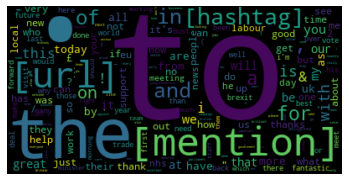

In [82]:
create_wordcloud(con_fql)

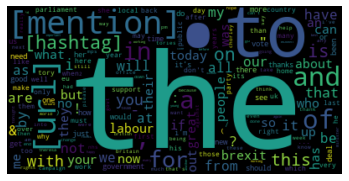

In [83]:
create_wordcloud(lab_fql)

In [84]:
def relative_freqs(fql):
    size = sum(fql.values())
    return {term: fql[term]/size for term in fql}

In [85]:
con_rel = relative_freqs(con_fql)
lab_rel = relative_freqs(lab_fql)

In [86]:
# Use log ratio for key words comparison between sub-corpora
from math import log

#Calculates log ratio for terms in corpus1, compared to corpus2.
#we pass the corpus sizes for ease.
#If the term is not present in corpus2, we make the frequency 0.5.
def log_ratio(corpus1, corpus1_size, corpus2, corpus2_size):
    return {term: log((corpus1[term]/corpus1_size)/((corpus2[term] if corpus2[term] else 0.5)/corpus2_size),2) for term in corpus1}

In [87]:
for term in con_fql:
    print(term)
con_lr = log_ratio(con_fql, con_size, lab_fql, lab_size)

interesting
series
of
tweets
from
leading
snp
figures
illuminating
the
growing
divides
among
nationalists
-
arguing
over
independence
tactics
while
most
scots
want
holyrood
to
focus
on
schools
,
nhs
and
economic
growth
[url]
good
hear
some
important
voices
in
scottish
farming
thanks
top
campaigner
[mention]
great
team
conservative
unionist
councillors
aberdeenshire
are
delivering
a
superb
service
for
people
north
east
teeth
an
unsympathetic
government
pleasure
visit
buckie
firsthand
local
skippers
about
sea
opportunity
our
fishing
industry
outside
eu
his
work
behalf
coastal
communities
north-east
is
scotland's
larder
home
amazing
food
producers
we
need
celebrate
peter
cook
their
championing
farmers
meet
working
so
hard
safeguard
salmon
beautiful
river
dee
with
as
ever
thoughtful
contribution
current
debates
delighted
nominate
be
chair
natural
england
.
he
brings
range
experience
wwf
prince
wales
friends
earth
many
others
it's
[hashtag]
!
peterborough
see
marvellous
community
carly
leon

In [88]:
# Sort by log ratio
sorted_terms = sorted(con_lr.items(), key=lambda x: x[1], reverse=True)
print(sorted_terms[:20])

[('welwyn', 9.054423130183011), ('ashford', 8.938326065260139), ('fm', 8.498904407354336), ('wgc', 8.1410108151791), ('bromsgrove', 7.604257407500565), ('counterpart', 6.978072244052896), ('orpington', 6.776438382883246), ('dit', 6.663963653624833), ('staffs', 6.663963653624833), ('farnham', 6.624435289438195), ('leonards', 6.541973129246222), ('mili', 6.498904407354337), ('exhibitors', 6.454510287995883), ('grt', 6.454510287995883), ("miliband's", 6.361400883604402), ("w'", 6.261865210053488), ('ebola', 6.209397790159351), ('putney', 6.182430742559083), ('ira', 6.154950006136976), ('southfields', 6.154950006136976)]


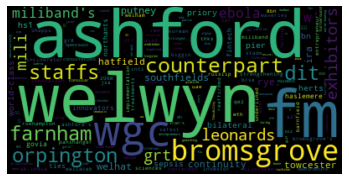

In [89]:
create_wordcloud(con_lr)

[('chorley', 9.627638753357989), ('walthamstow', 9.25629614570347), ('thankyou', 8.061189550288159), ('….', 7.988433207852845), ('camden', 7.3528446340617215), ('↓', 6.920529143351041), ('→', 6.849270460181221), ('deportation', 6.7353142708841345), ('tottenham', 6.4762270495670045), ('hoylel', 6.3528446340617215), ("tories'", 6.300377214167585), ('tbh', 6.160199556119325), ('botched', 6.100078563681755), ('deported', 6.100078563681755), ('islamophobia', 6.004921330641414), ('clp', 6.004921330641414), ('holborn', 5.903041716622202), ('murdoch', 5.8674178068914795), ('ponty', 5.793417225447703), ('pancras', 5.754943077633067)]


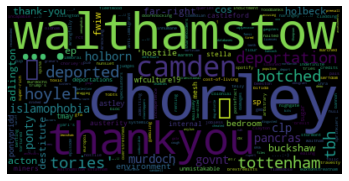

In [90]:
lab_lr = log_ratio(lab_fql, lab_size, con_fql, con_size)
sorted_terms = sorted(lab_lr.items(), key=lambda x: x[1], reverse=True)
print(sorted_terms[:20])
create_wordcloud(lab_lr)

### TF-IDF

In [92]:
#doc is a Counter representing an fql from a document.
def tf(term, doc):
    return doc[term] / sum(doc.values()) #term freq / total terms (relative term freq)

def num_containing(term, corpus):
    return sum(1 for doc in corpus if term in doc) #counts docs in corpus containing term.

#1 added to numerator and denominator is for preventing division by zero. Equivalent of an extra document containing all terms once.
def idf(term, corpus):
    n_t = num_containing(term,corpus)
    return log((len(corpus)+1) / ((n_t) + 1))
    
def tfidf(term, doc, corpus):
    return tf(term, doc) * idf(term, corpus)

We can calculate the TF-IDF for every term for every MP in the corpus. By listing the terms with the highest TF-IDF, we can look at terms that are used by that MP frequently, but only used by that MP alone, or a small number of MPs.

In [93]:
corpus_fqls = [doc.tokens_fql for doc in corpus]
for doc in corpus:
    print(doc.meta['username'], doc.meta['party'])
    scores = {term: tfidf(term,doc.tokens_fql,corpus_fqls) for term in doc.tokens_fql}
    sorted_terms = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    for term, score in sorted_terms[:5]:
        print("\tToken: {}, TF-IDF: {}".format(term, round(score, 5)))

jeremycorbyn labour
	Token: unmistakable, TF-IDF: 0.00091
	Token: rigged, TF-IDF: 0.00061
	Token: austerity, TF-IDF: 0.00057
	Token: speculators, TF-IDF: 0.00054
	Token: tories', TF-IDF: 0.00052
Keir_Starmer labour
	Token: camden, TF-IDF: 0.00639
	Token: pancras, TF-IDF: 0.00285
	Token: holborn, TF-IDF: 0.00264
	Token: kentish, TF-IDF: 0.00224
	Token: sp, TF-IDF: 0.00165
tom_watson labour
	Token: gambling, TF-IDF: 0.00138
	Token: sugar, TF-IDF: 0.00128
	Token: newsletter, TF-IDF: 0.00085
	Token: diabetes, TF-IDF: 0.00082
	Token: obesity, TF-IDF: 0.00077
stellacreasy labour
	Token: walthamstow, TF-IDF: 0.01337
	Token: …., TF-IDF: 0.00554
	Token: …, TF-IDF: 0.00201
	Token: fwiw, TF-IDF: 0.00164
	Token: @, TF-IDF: 0.00126
OwenSmith_MP labour
	Token: mesh, TF-IDF: 0.00268
	Token: ponty, TF-IDF: 0.00258
	Token: pontypridd, TF-IDF: 0.0019
	Token: folic, TF-IDF: 0.00115
	Token: flour, TF-IDF: 0.00109
LindsayHoyle_MP labour
	Token: chorley, TF-IDF: 0.02472
	Token: hoylel, TF-IDF: 0.00343
	Toke

### Exercises